In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize

In [83]:
boston=load_boston()

In [84]:
data=boston.data
target=boston.target
df=pd.DataFrame(data,columns=boston.feature_names)
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [85]:
array=np.array(df.loc[:,(df.columns=='RM')|(df.columns=='AGE')])

In [86]:
l=tuple([2,3,4,5])
l[1]

3

In [87]:
j=np.hstack((np.reshape(np.ones_like(array[:,0]),(-1,1)),array))
np.random.rand(j.shape[1],1)

array([[0.90454179],
       [0.42645265],
       [0.57156395]])

In [88]:
def fit(x,y,method):
    xarray=np.array(x)
    yarray=np.array(y)
    ones=np.ones_like(x[:,0])
    xarray=np.hstack((np.reshape(np.ones_like(x[:,0]),(-1,1)),x))
    theta=np.random.rand(xarray.shape[1],1)
    yarray=y.reshape((-1,1))
    if method=='grad_descent':
        output=grad_descent(xarray,yarray,theta)
    elif method=='normal_equation':
        output=normal_equation(xarray,yarray)
    return output

In [89]:
def grad_descent(x,y,theta):
    alpha=0.0001
    jdetails=np.array([])
    jrepeat=np.array([])
    last=cost_function(x,y,theta)
    index=1
    while(True):
        theta=theta-alpha*(np.dot(x.T, (hypotsis_function(x,theta)- y)))
        jdetails= np.hstack((jdetails, np.array([cost_function(x,y,theta)])))
        jrepeat=np.hstack((jrepeat, np.array([index])))
        index+=1
        if cost_function(x,y,theta)>=last:
            alpha=alpha/3
        elif last - cost_function(x,y,theta) <1:
            return {'theta':theta, 'details':jdetails,'repeat':jrepeat}
        last=cost_function(x,y,theta)

In [90]:
def cost_function(x,y,theta):
    predictions = x@ theta
    errors = predictions - y
    return 0.5 * (errors.T@ errors)[0, 0]

In [91]:
def hypotsis_function(x,theta):
    return x@theta

In [92]:
def predict(x,theta):
    x=np.hstack((np.reshape(np.ones_like(x[:,0]),(-1,1)),x))
    return x@theta

In [93]:
def normal_equation(x,y):
    return np.linalg.pinv(x.T@x)@(x.T@y)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
data=np.hstack((data,data**2))
data=normalize(data)
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.4,random_state=42)

In [96]:
result=fit(xtrain,ytrain,'grad_descent')
result

{'theta': array([[ 1.21063696e+01],
        [ 3.46054602e-01],
        [ 3.60466413e-01],
        [ 6.94319673e-01],
        [ 3.26110290e-02],
        [ 9.66436102e-01],
        [ 1.35868529e-01],
        [ 9.58107473e-01],
        [ 7.77920674e-01],
        [ 1.81806784e-01],
        [ 8.45038989e-01],
        [ 9.59285534e-01],
        [ 3.63775516e-01],
        [ 8.81353773e-01],
        [-2.10359740e-03],
        [ 1.19262970e+00],
        [ 2.91089866e-01],
        [ 4.56782335e-02],
        [ 1.07565897e-01],
        [ 4.92045158e-01],
        [ 2.50252056e-01],
        [ 8.11202333e-01],
        [ 2.32759661e-01],
        [ 2.32681767e+00],
        [ 6.35073689e-01],
        [ 1.44505583e+01],
        [ 6.74039890e-01]]),
 'details': array([82656.25895637, 74981.51001117, 68144.70757078, 62054.15700946,
        56628.19937535, 51794.11300448, 47487.13535129, 43649.59187807,
        40230.12028591, 37182.97965226, 34467.43518219, 32047.21029748,
        29889.99869371, 27967.029

In [97]:
theta=result.get('theta')
jdetails=result.get('details')
jrepeat=result.get('repeat')

In [98]:
theta

array([[ 1.21063696e+01],
       [ 3.46054602e-01],
       [ 3.60466413e-01],
       [ 6.94319673e-01],
       [ 3.26110290e-02],
       [ 9.66436102e-01],
       [ 1.35868529e-01],
       [ 9.58107473e-01],
       [ 7.77920674e-01],
       [ 1.81806784e-01],
       [ 8.45038989e-01],
       [ 9.59285534e-01],
       [ 3.63775516e-01],
       [ 8.81353773e-01],
       [-2.10359740e-03],
       [ 1.19262970e+00],
       [ 2.91089866e-01],
       [ 4.56782335e-02],
       [ 1.07565897e-01],
       [ 4.92045158e-01],
       [ 2.50252056e-01],
       [ 8.11202333e-01],
       [ 2.32759661e-01],
       [ 2.32681767e+00],
       [ 6.35073689e-01],
       [ 1.44505583e+01],
       [ 6.74039890e-01]])

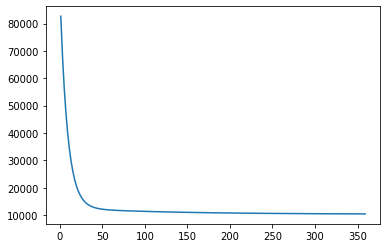

In [99]:
plt.plot(jrepeat,jdetails)

In [100]:
xtest

array([[5.11515859e-07, 0.00000000e+00, 2.25717937e-05, ...,
        1.53577370e-03, 8.71774227e-01, 4.55457555e-04],
       [3.31530285e-07, 2.34961223e-04, 3.76525360e-05, ...,
        1.81953971e-03, 9.25333745e-01, 7.31957075e-05],
       [2.00256237e-07, 0.00000000e+00, 5.25355401e-05, ...,
        7.65136394e-04, 2.88217874e-01, 6.18390843e-04],
       ...,
       [2.44006288e-07, 1.62554748e-04, 8.73151218e-05, ...,
        1.92302267e-03, 9.05853170e-01, 3.86564479e-04],
       [5.61024551e-06, 0.00000000e+00, 9.75062642e-05, ...,
        1.07610463e-03, 5.86836115e-01, 7.31518089e-04],
       [3.47783972e-06, 0.00000000e+00, 3.45798420e-05, ...,
        1.68861177e-03, 8.50019099e-01, 5.49958365e-04]])

In [101]:
xtest
pred=predict(xtest,theta)

In [102]:
pred

array([[25.85436811],
       [26.37661269],
       [18.50663079],
       [25.6639236 ],
       [18.90181136],
       [23.41437943],
       [25.67816505],
       [22.88987577],
       [19.10960407],
       [24.10362896],
       [26.12908289],
       [25.50905395],
       [14.69651632],
       [23.71797933],
       [25.93895765],
       [18.6903211 ],
       [26.68956883],
       [18.65796415],
       [26.37525626],
       [19.14224036],
       [26.59437677],
       [26.37672409],
       [25.16607272],
       [26.13029492],
       [17.63093684],
       [18.25369818],
       [23.93310137],
       [14.44247111],
       [26.08644067],
       [24.10394194],
       [25.86864373],
       [25.99685608],
       [19.14199653],
       [18.8148126 ],
       [17.84341417],
       [19.88145245],
       [26.4485207 ],
       [26.58823646],
       [25.98019642],
       [25.47870743],
       [24.10466241],
       [26.60543184],
       [26.60961577],
       [25.04556161],
       [26.16711458],
       [19

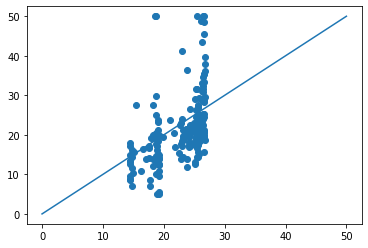

In [103]:
plt.scatter(pred.reshape((1,-1)),ytest)
plt.plot([[0],[50]],[[0],[50]])

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model=LinearRegression()

In [106]:
model.fit(xtrain,ytrain)

LinearRegression()

In [107]:
pr=model.predict(xtest)

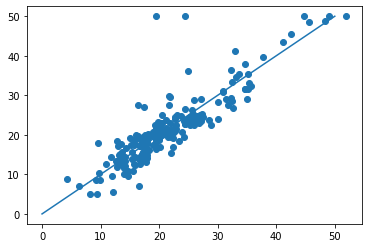

In [108]:
plt.scatter(pr,ytest)
plt.plot([[0],[50]],[[0],[50]])

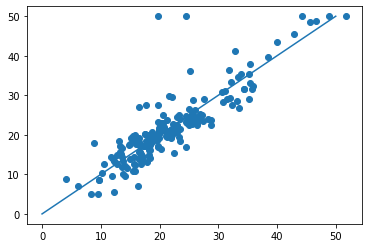

In [109]:
theta=fit(xtrain,ytrain,'normal_equation')
pred=predict(xtest,theta)
plt.scatter(pred.reshape((1,-1)),ytest)
plt.plot([[0],[50]],[[0],[50]])